In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [4]:
digits = load_digits()

In [6]:
print(f"IMAGE DATA SHAPE - {digits.data.shape}")
print(f"LABEL DATA SHAPE - {digits.target.shape}")

IMAGE DATA SHAPE - (1797, 64)
LABEL DATA SHAPE - (1797,)


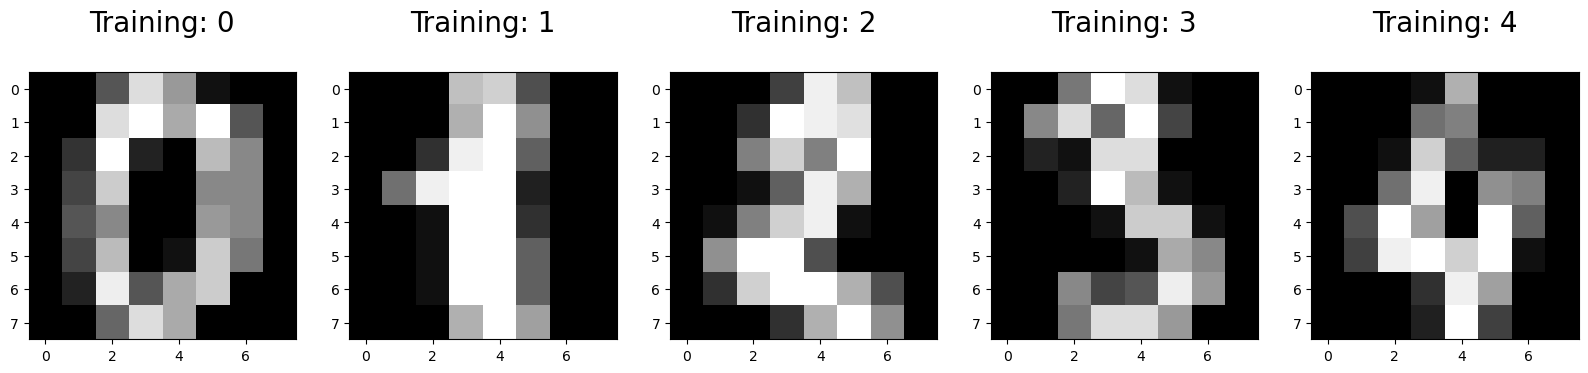

In [7]:
#DISPLAYING SOME OF THE IMAGES AND LABELS
plt.figure(figsize = (20,4))
for index, (image,label) in enumerate(zip(digits.data[0:5], digits.target[0:5])):
    plt.subplot(1,5,index+1)
    plt.imshow(np.reshape(image, (8,8)),cmap = plt.cm.gray)
    plt.title('Training: %i\n'%label,fontsize=20)

In [8]:
#Spliting the data now
X_train, X_test, y_train, y_test = train_test_split(digits.data,digits.target,test_size=0.23,random_state=2)

In [9]:
print(X_train.shape)

(1383, 64)


In [10]:
print(y_train.shape)

(1383,)


In [11]:
print(X_test.shape)

(414, 64)


In [12]:
print(y_test.shape)

(414,)


In [13]:
#importing the model now
from sklearn.linear_model import LogisticRegression

In [14]:
log = LogisticRegression()
log.fit(X_train,y_train)

C:\Users\PROGRAMMING\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [15]:
#Predicting the output of first element of the test set
print(log.predict(X_test[0].reshape(1,-1)))

[4]


In [16]:
#Predicting the output of first 10 elements of the test set
print(log.predict(X_test[0:10]))

[4 0 9 1 8 7 1 5 1 6]


In [17]:
#Predicting for entire dataset
predictions = log.predict(X_test)

In [18]:
#determining the accuracy of the model
score = log.score(X_test,y_test)
print(score)

0.9516908212560387


In [19]:
from sklearn.metrics import confusion_matrix
cm = metrics.confusion_matrix(y_test,predictions)
print(cm)
#More the number of diagonals, beter the matrix.

[[37  0  0  0  1  0  0  0  0  0]
 [ 0 45  0  1  0  0  0  0  1  1]
 [ 0  0 43  0  0  0  0  0  0  0]
 [ 0  0  0 40  0  0  0  1  1  0]
 [ 0  0  0  0 34  0  0  0  3  1]
 [ 0  1  0  0  1 44  0  0  0  0]
 [ 0  1  0  0  0  0 39  0  1  0]
 [ 0  0  0  0  0  0  0 45  1  0]
 [ 0  0  0  0  0  0  0  0 37  1]
 [ 0  0  0  2  0  1  0  0  1 30]]


Text(0.5, 1.0, 'Accuracy Score : 0.9516908212560387')

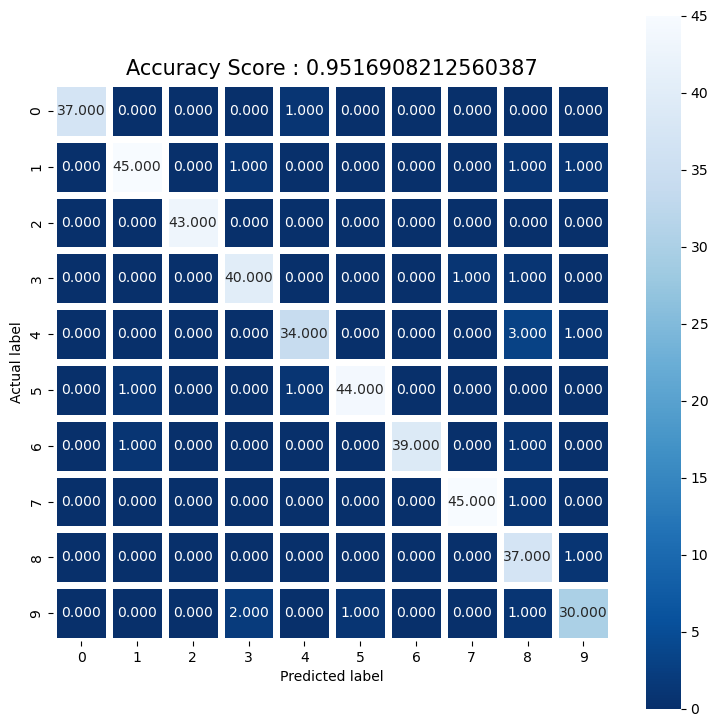

In [20]:
plt.figure(figsize=(9,9))
sns.heatmap(cm,annot=True,fmt=".3f",linewidths=5,square=True,cmap='Blues_r');
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score : {0}'.format(score)
plt.title(all_sample_title,size=15)

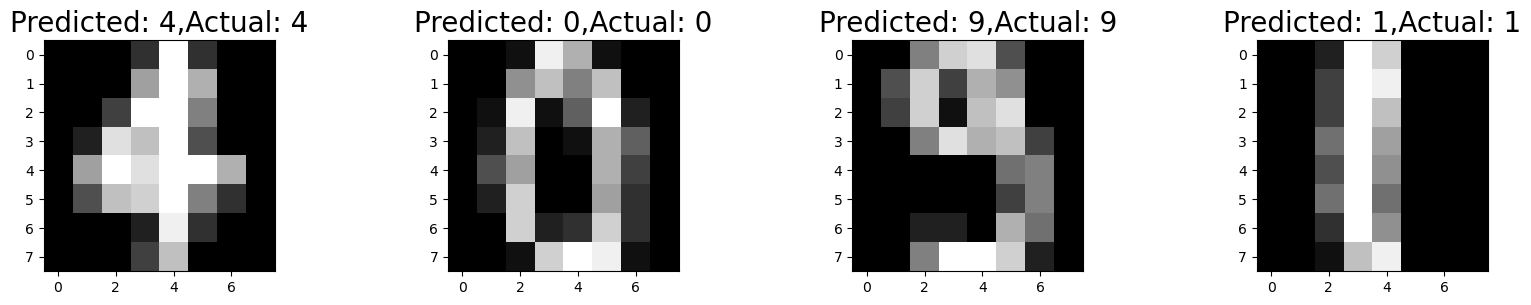

In [22]:
index = 0
classifiedIndex = []
for predict, actual in zip(predictions,y_test):
    if predict==actual:
        classifiedIndex.append(index)
    index+=1
plt.figure(figsize=(20,3))
for plotIndex, wrong in enumerate(classifiedIndex[0:4]):
    plt.subplot(1,4,plotIndex+1)
    plt.imshow(np.reshape(X_test[wrong],(8,8)),cmap=plt.cm.gray)
    plt.title("Predicted: {},Actual: {}".format(predictions[wrong],y_test[wrong]),fontsize=20)